<span style="color:Olive">
<font size="6">Agglomarative Clustering</font>
</span> 

In [1]:
import pickle
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

<span style="color:Olive">
<font size="5">Agglomorative Clustering with PCA</font>
</span> 


<span style="color:Orange">
<font size="4">Reading from files</font>
</span> 

In [2]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, '../Libraries')
sys.path.insert(0, '../Datas/')

from Load_data import *

In [3]:
dataset='591'
df=loaddata( 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

In [4]:

from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:orange">
<font size="4">Creating object</font>
</span> 


In [5]:
from Agglomorative_model import *
agglo = Agglomorative_Clustering(feature_vectors,y)

<span style="color:Orange">
<font size="4">Confusion Matrix</font>
</span> 


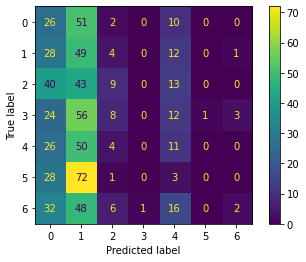

In [6]:
agglo.printConfusionMatrix()

<span style="color:Orange">
<font size="4">Dendogram</font>
</span> 


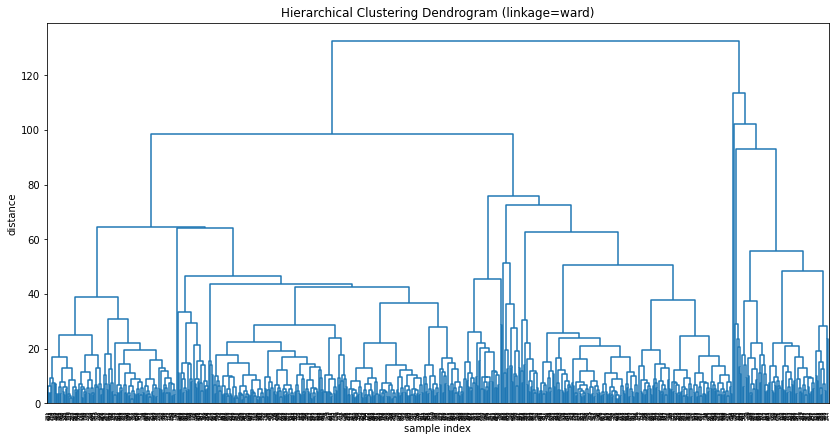

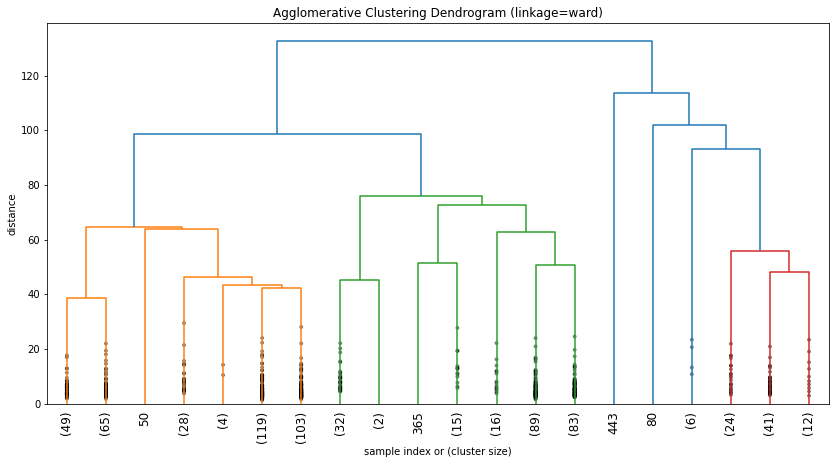

In [7]:
agglo.plotDendogram(nClusters=20)

<span style="color:Orange">
<font size="4">Print metrics results with original data</font>
</span> 


In [8]:
clusters = [2, 7, 20]
agglo.printDataMetrics(arr=clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.3164               82.755               1.8745              
----------------------------------------------------------------------------------------------------
#clusters=7          0.1191               75.1159              1.436               
----------------------------------------------------------------------------------------------------
#clusters=20         0.0711               59.0707              1.4094              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      accuracy_score      
#clusters=2          0.0009               0.0062                         0.01                           0.0059               0.031                0.01              

<span style="color:Orange">
<font size="4">Print metrics result with reduced data</font>
</span> 


In [9]:
clusters = [2, 7, 20]
agglo.printDataMetrics(arr=clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.38510000705718994  516.2011             1.064               
----------------------------------------------------------------------------------------------------
#clusters=7          0.3517000079154968   641.9264             0.8425              
----------------------------------------------------------------------------------------------------
#clusters=20         0.3797999918460846   740.5108             0.7895              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      accuracy_score      
#clusters=2          0.0024               0.003                          0.0063                         0.0043               0.0119               0.0063            

<span style="color:Orange">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


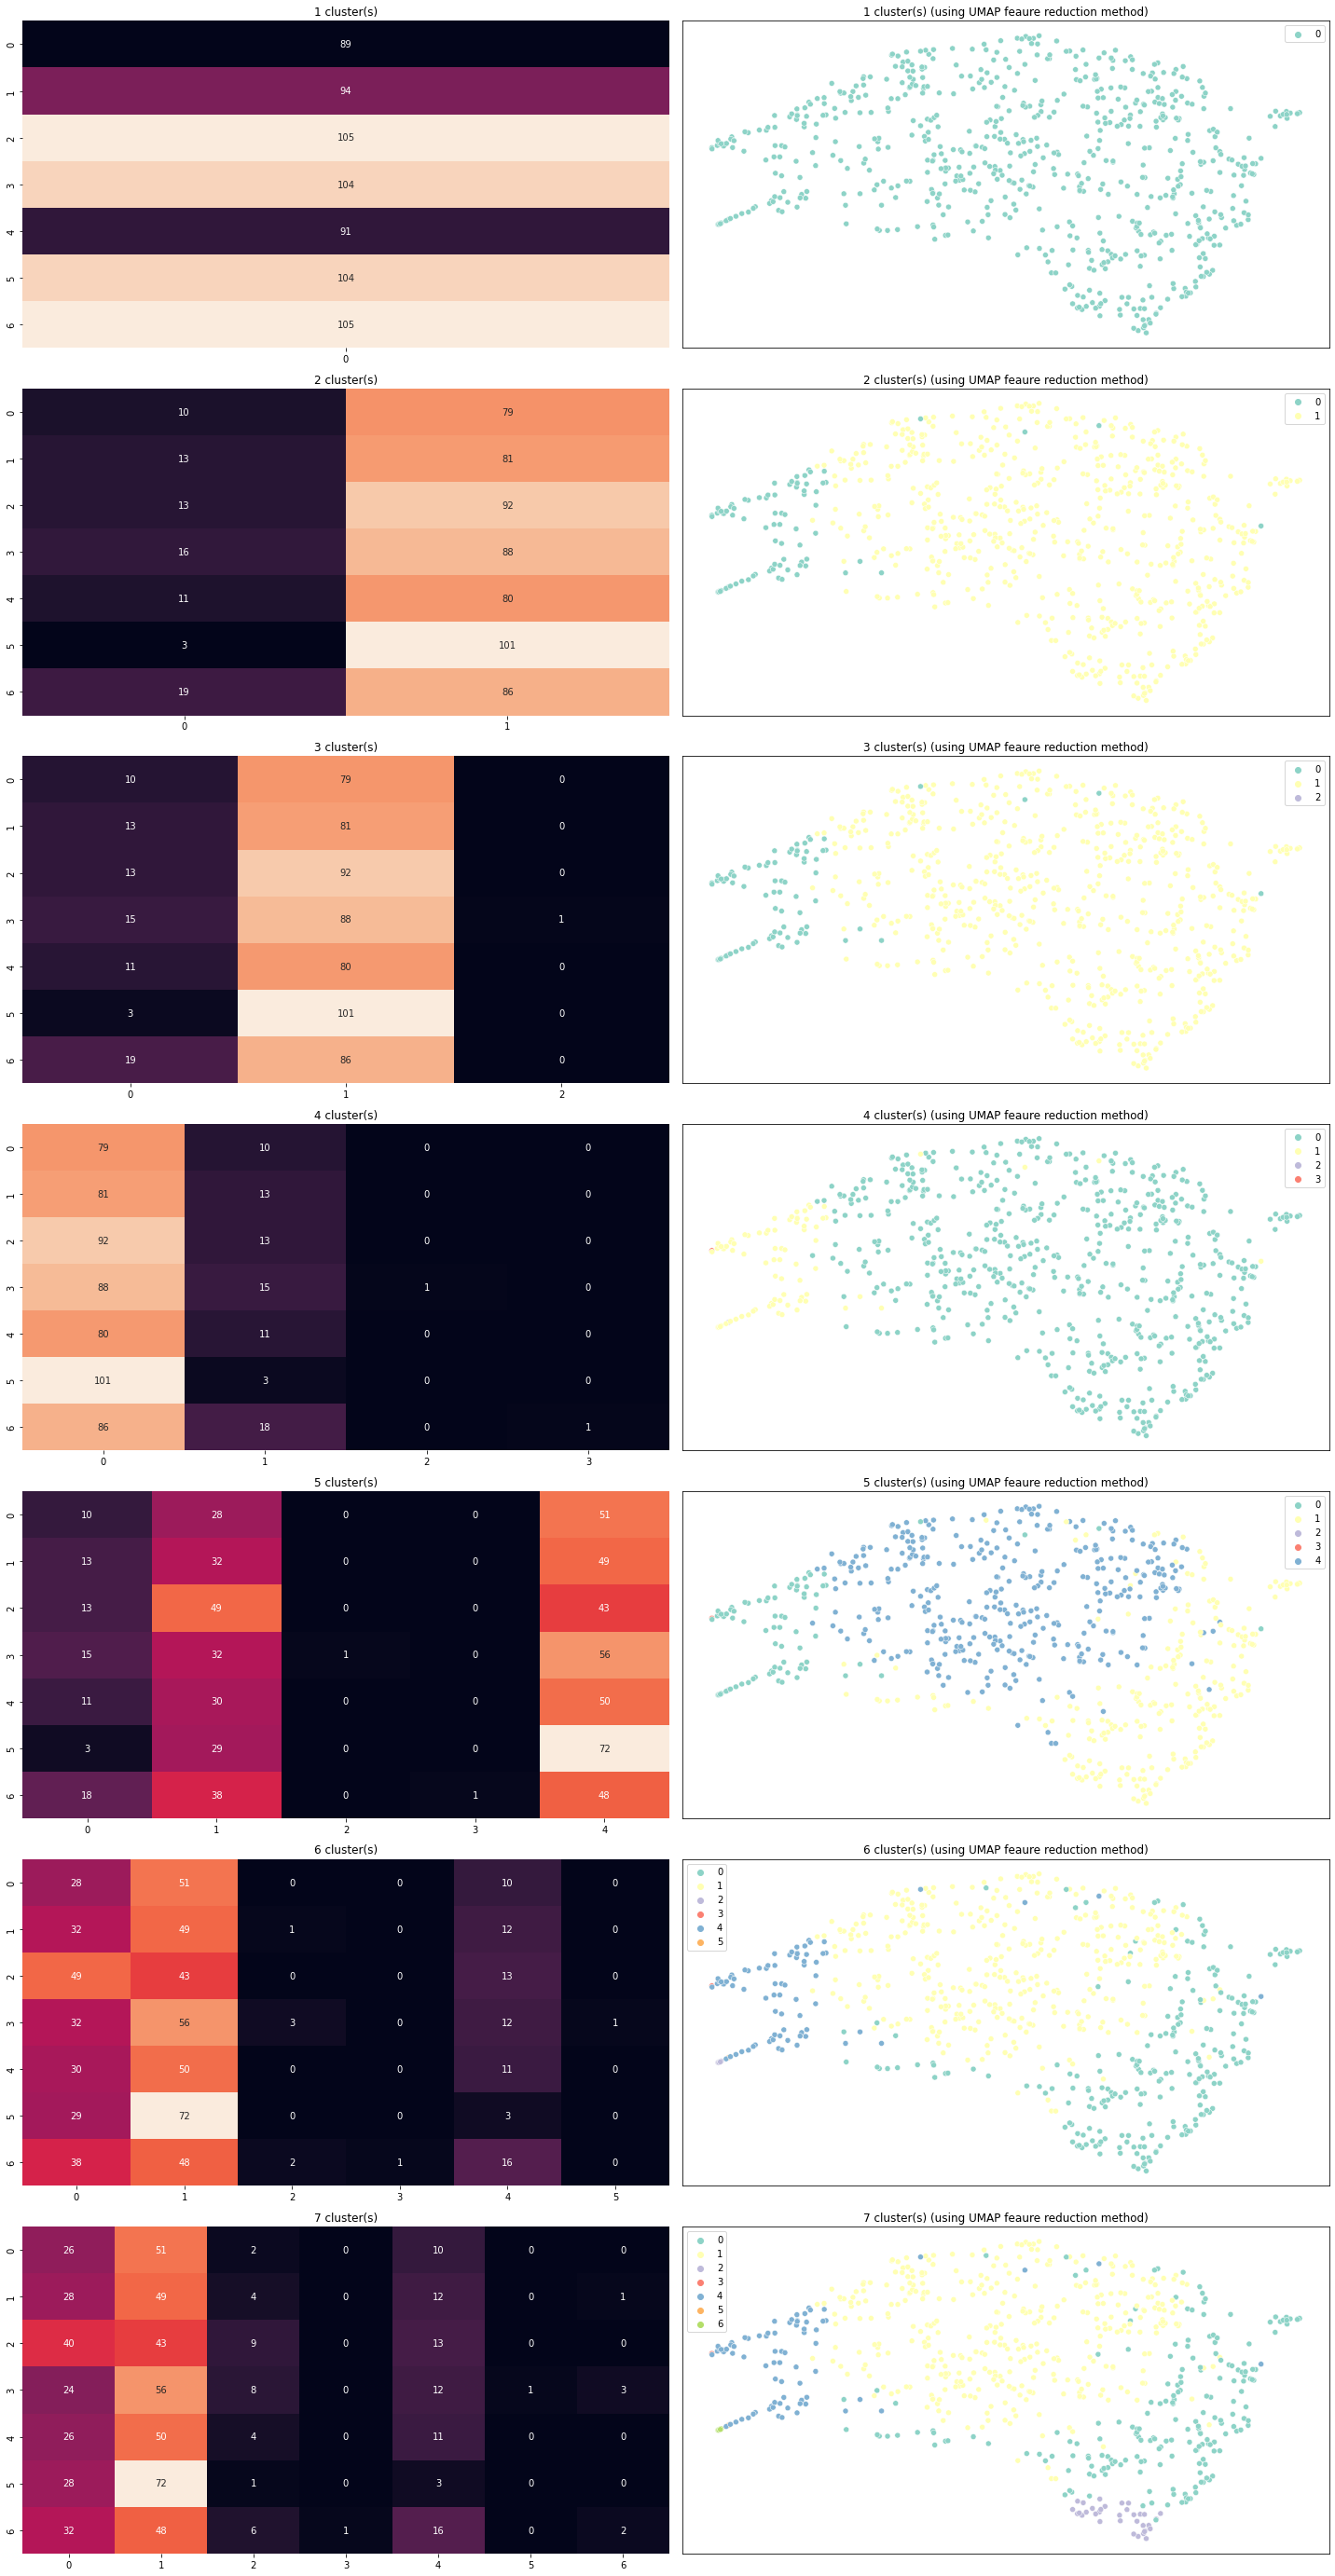

In [10]:
agglo.plotClusers(nClusters=7, fReductionPlot=False)

<span style="color:Orange">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


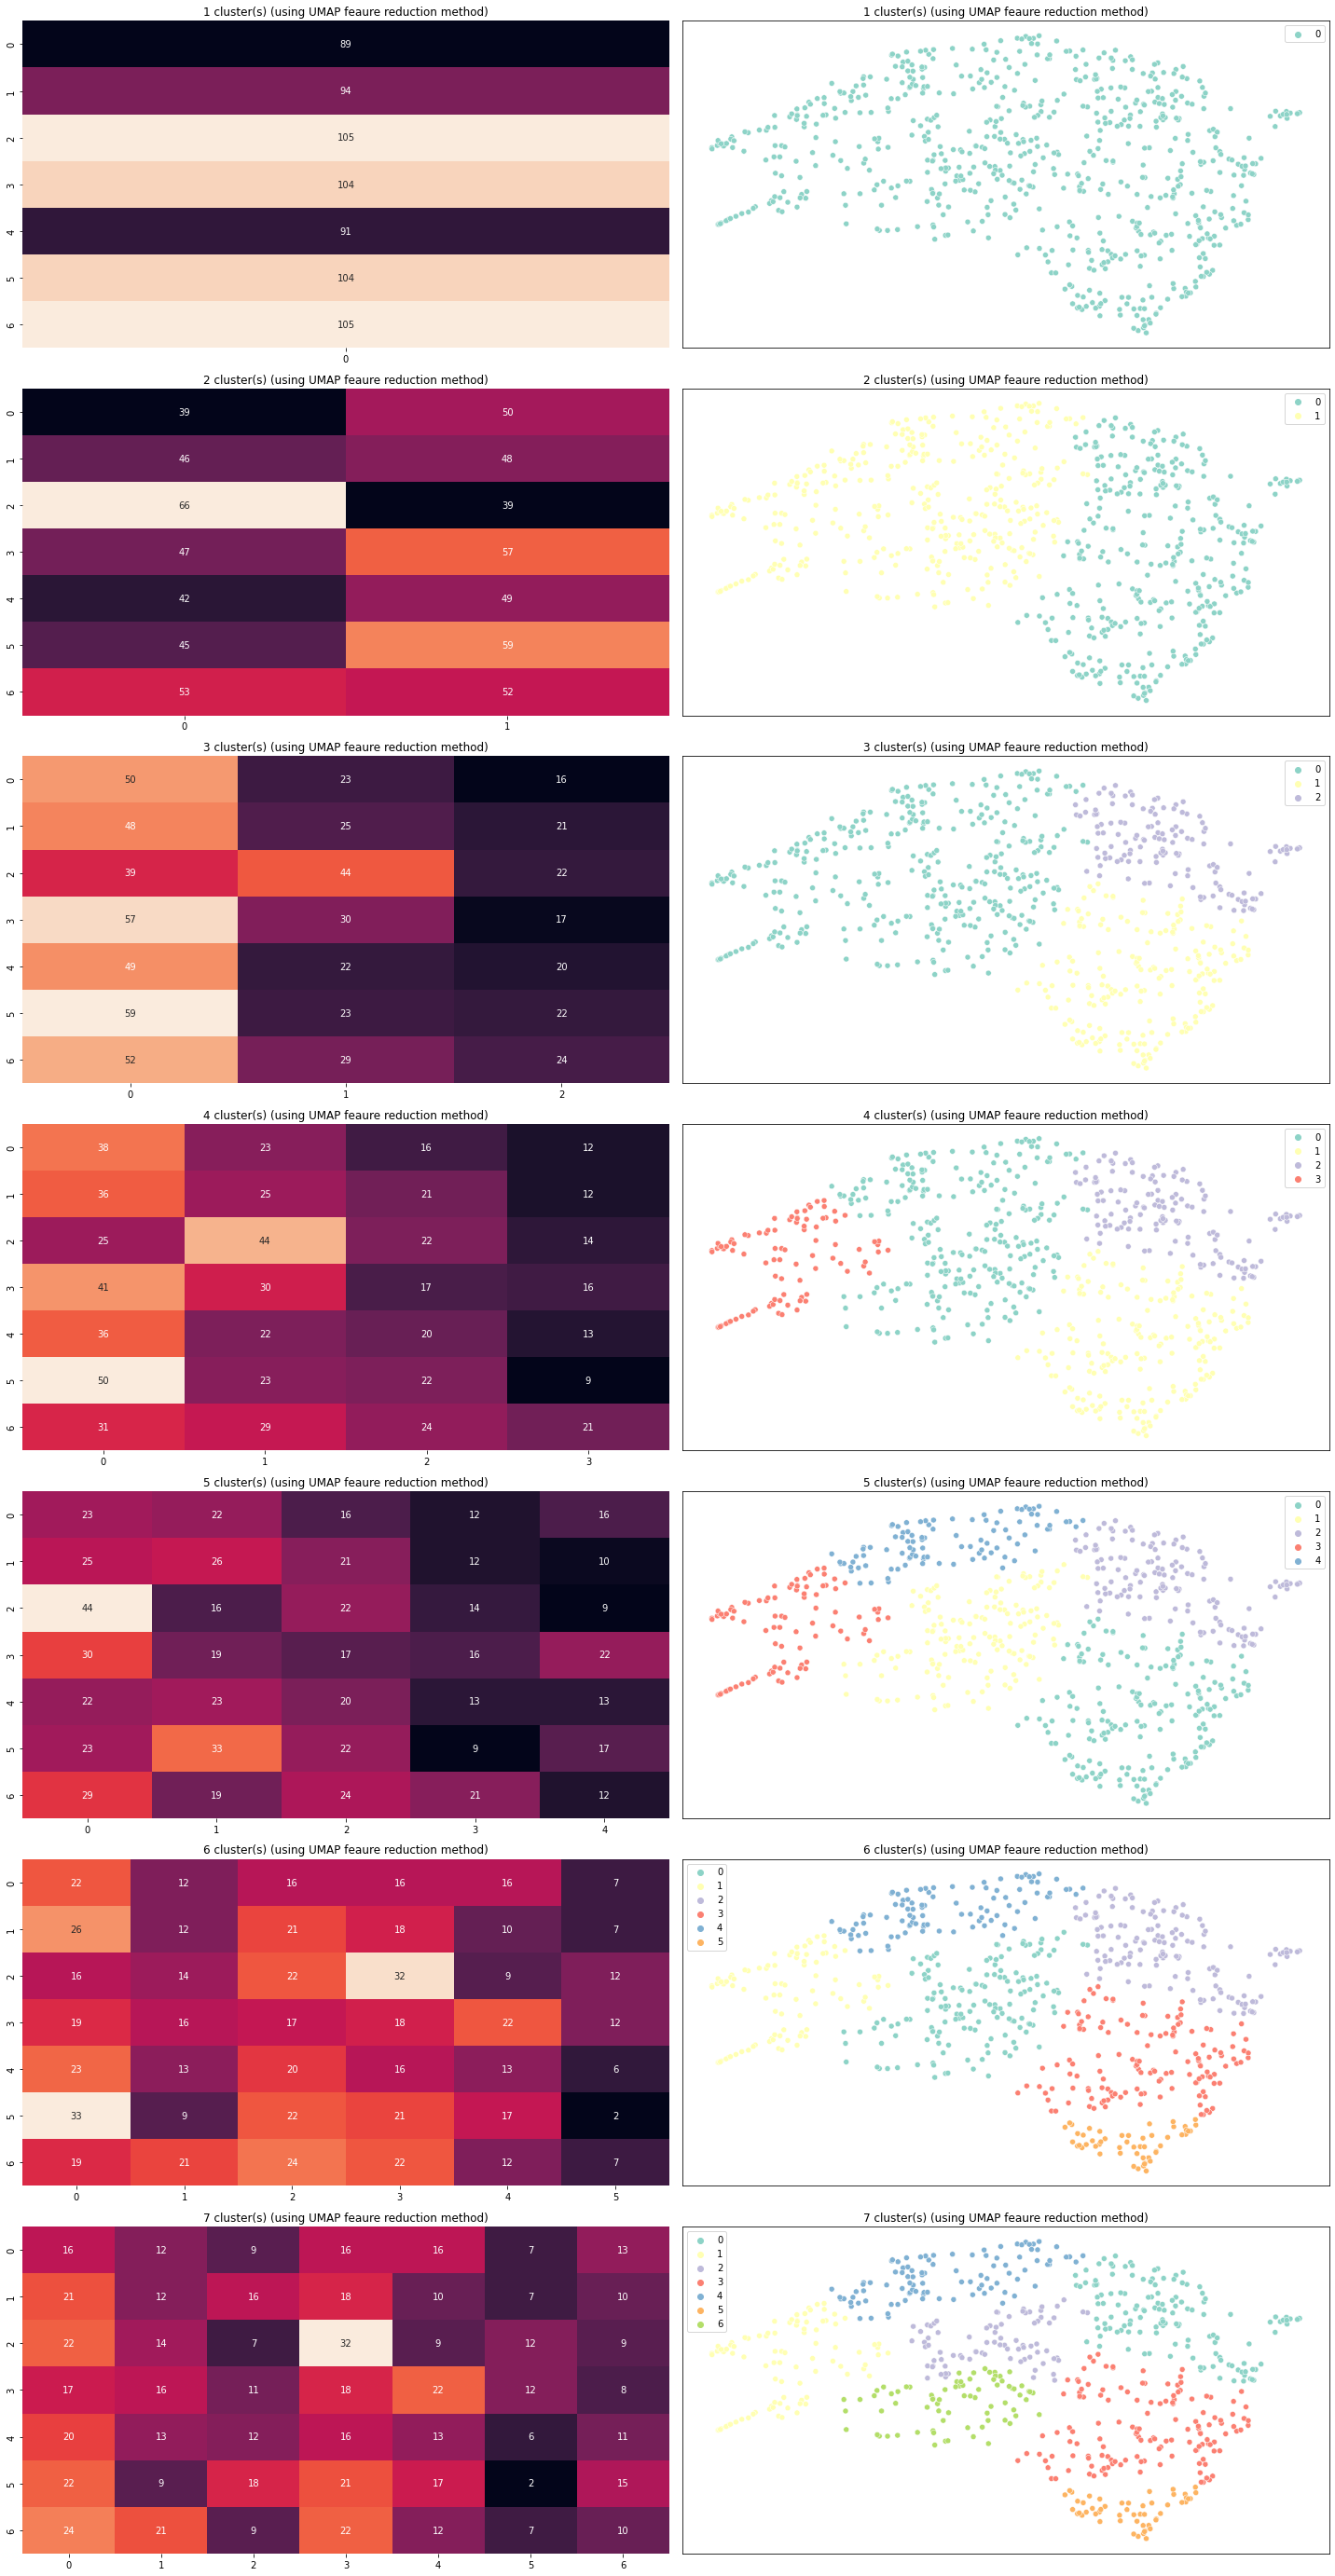

In [11]:
agglo.plotClusers(nClusters=7, fReductionPlot=True)

<span style="color:Orange">
<font size="4">plot clusters using the given array with original data </font>
</span> 


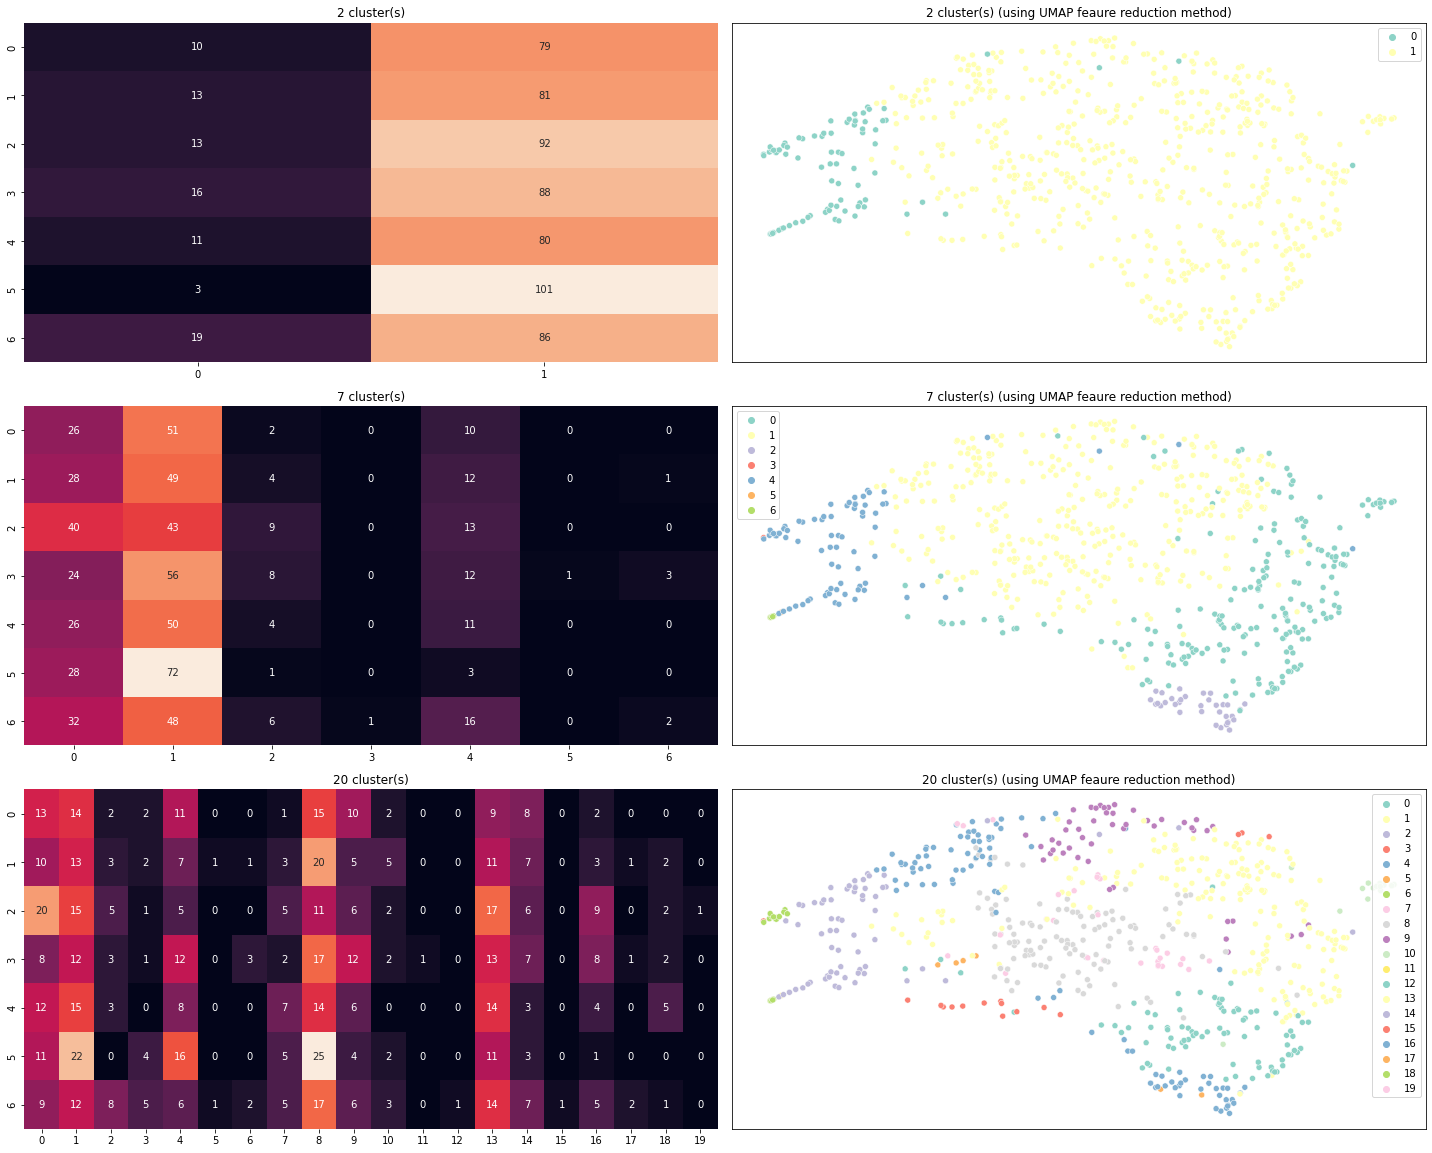

In [12]:
clusters = [2, 7, 20]
agglo.plotClustersUsingArr(clusters, fReduction=False)

<span style="color:Orange">
<font size="4">plot clusters, usig the given array with reduced data </font>
</span> 


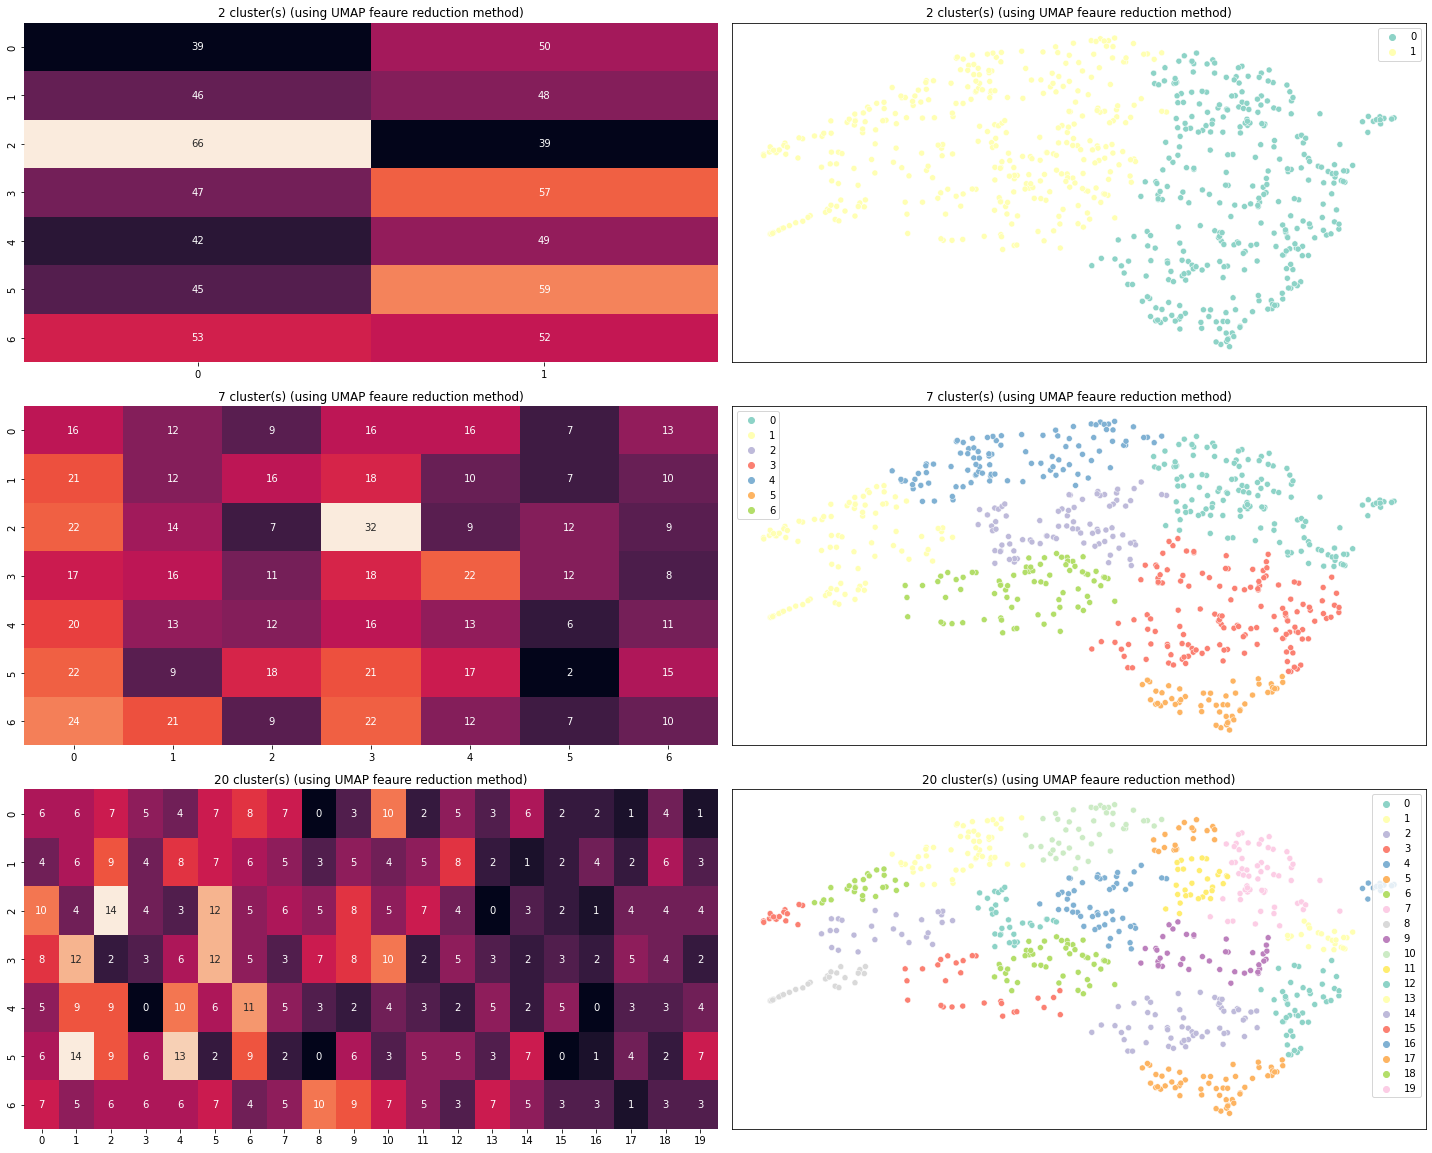

In [13]:
clusters = [2, 7, 20]
agglo.plotClustersUsingArr(clusters, fReduction=True)

<span style="color:Olive">
<font size="5">Agglomorative Clustering with chroma_cqt and melspectrogram</font>
</span> 


<span style="color:Orange">
<font size="4">Reading from files</font>
</span> 

In [14]:
dataset='591'
df=loaddata(
    features=["chroma_cqt","melspectrogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)


In [15]:

from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:orange">
<font size="4">Creating object</font>
</span> 


In [16]:
from Agglomorative_model import *
agglo = Agglomorative_Clustering(feature_vectors,y)

<span style="color:Orange">
<font size="4">Confusion Matrix</font>
</span> 


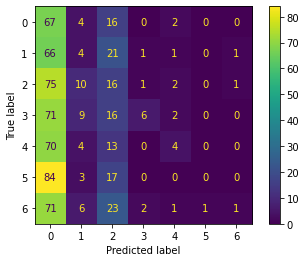

In [17]:
agglo.printConfusionMatrix()

<span style="color:Orange">
<font size="4">Dendogram</font>
</span> 


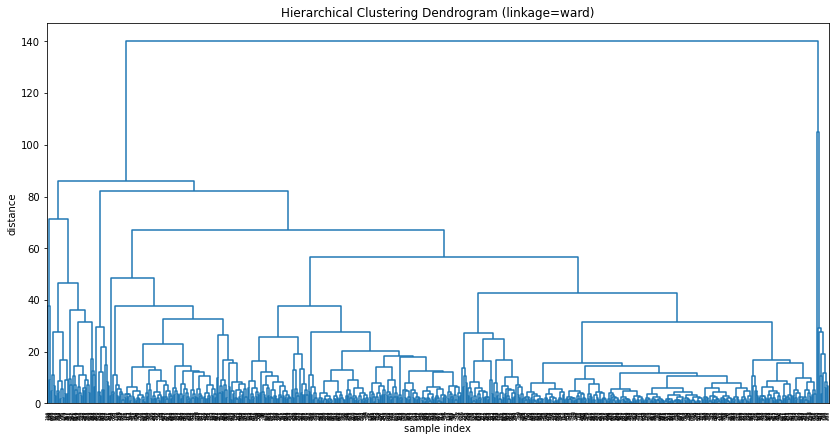

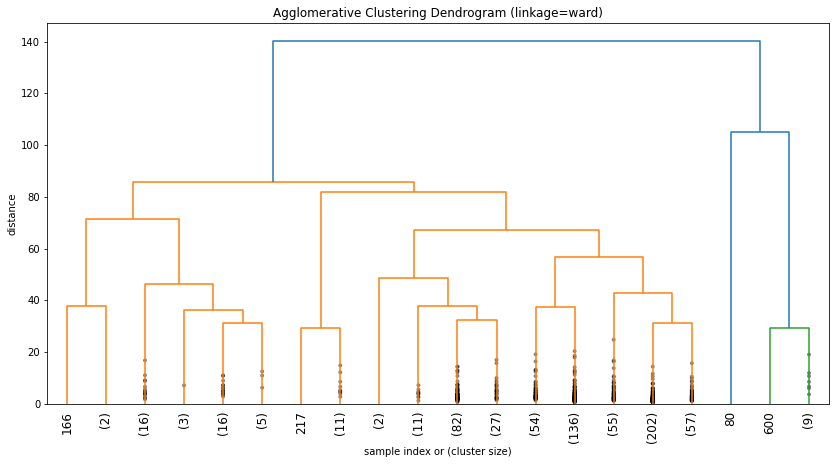

In [18]:
agglo.plotDendogram(nClusters=20)

<span style="color:Orange">
<font size="4">Print metrics results with original data</font>
</span> 


In [19]:
clusters = [2, 7, 20]
agglo.printDataMetrics(arr=clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.7703               172.8524             0.7523              
----------------------------------------------------------------------------------------------------
#clusters=7          0.2429               142.1992             1.1162              
----------------------------------------------------------------------------------------------------
#clusters=20         0.1512               110.5606             1.035               
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      accuracy_score      
#clusters=2          -0.0003              0.0074                         0.0124                         0.0065               0.1544               0.0124            

<span style="color:Orange">
<font size="4">Print metrics results with reduced data</font>
</span> 


In [20]:
clusters = [2, 7, 20]
agglo.printDataMetrics(arr=clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.38989999890327454  481.6106             0.947               
----------------------------------------------------------------------------------------------------
#clusters=7          0.36800000071525574  644.423              0.8188              
----------------------------------------------------------------------------------------------------
#clusters=20         0.43299999833106995  985.5987             0.7785              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      accuracy_score      
#clusters=2          0.0012               0.0018                         0.0051                         0.0034               0.0105               0.0051            

<span style="color:Orange">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


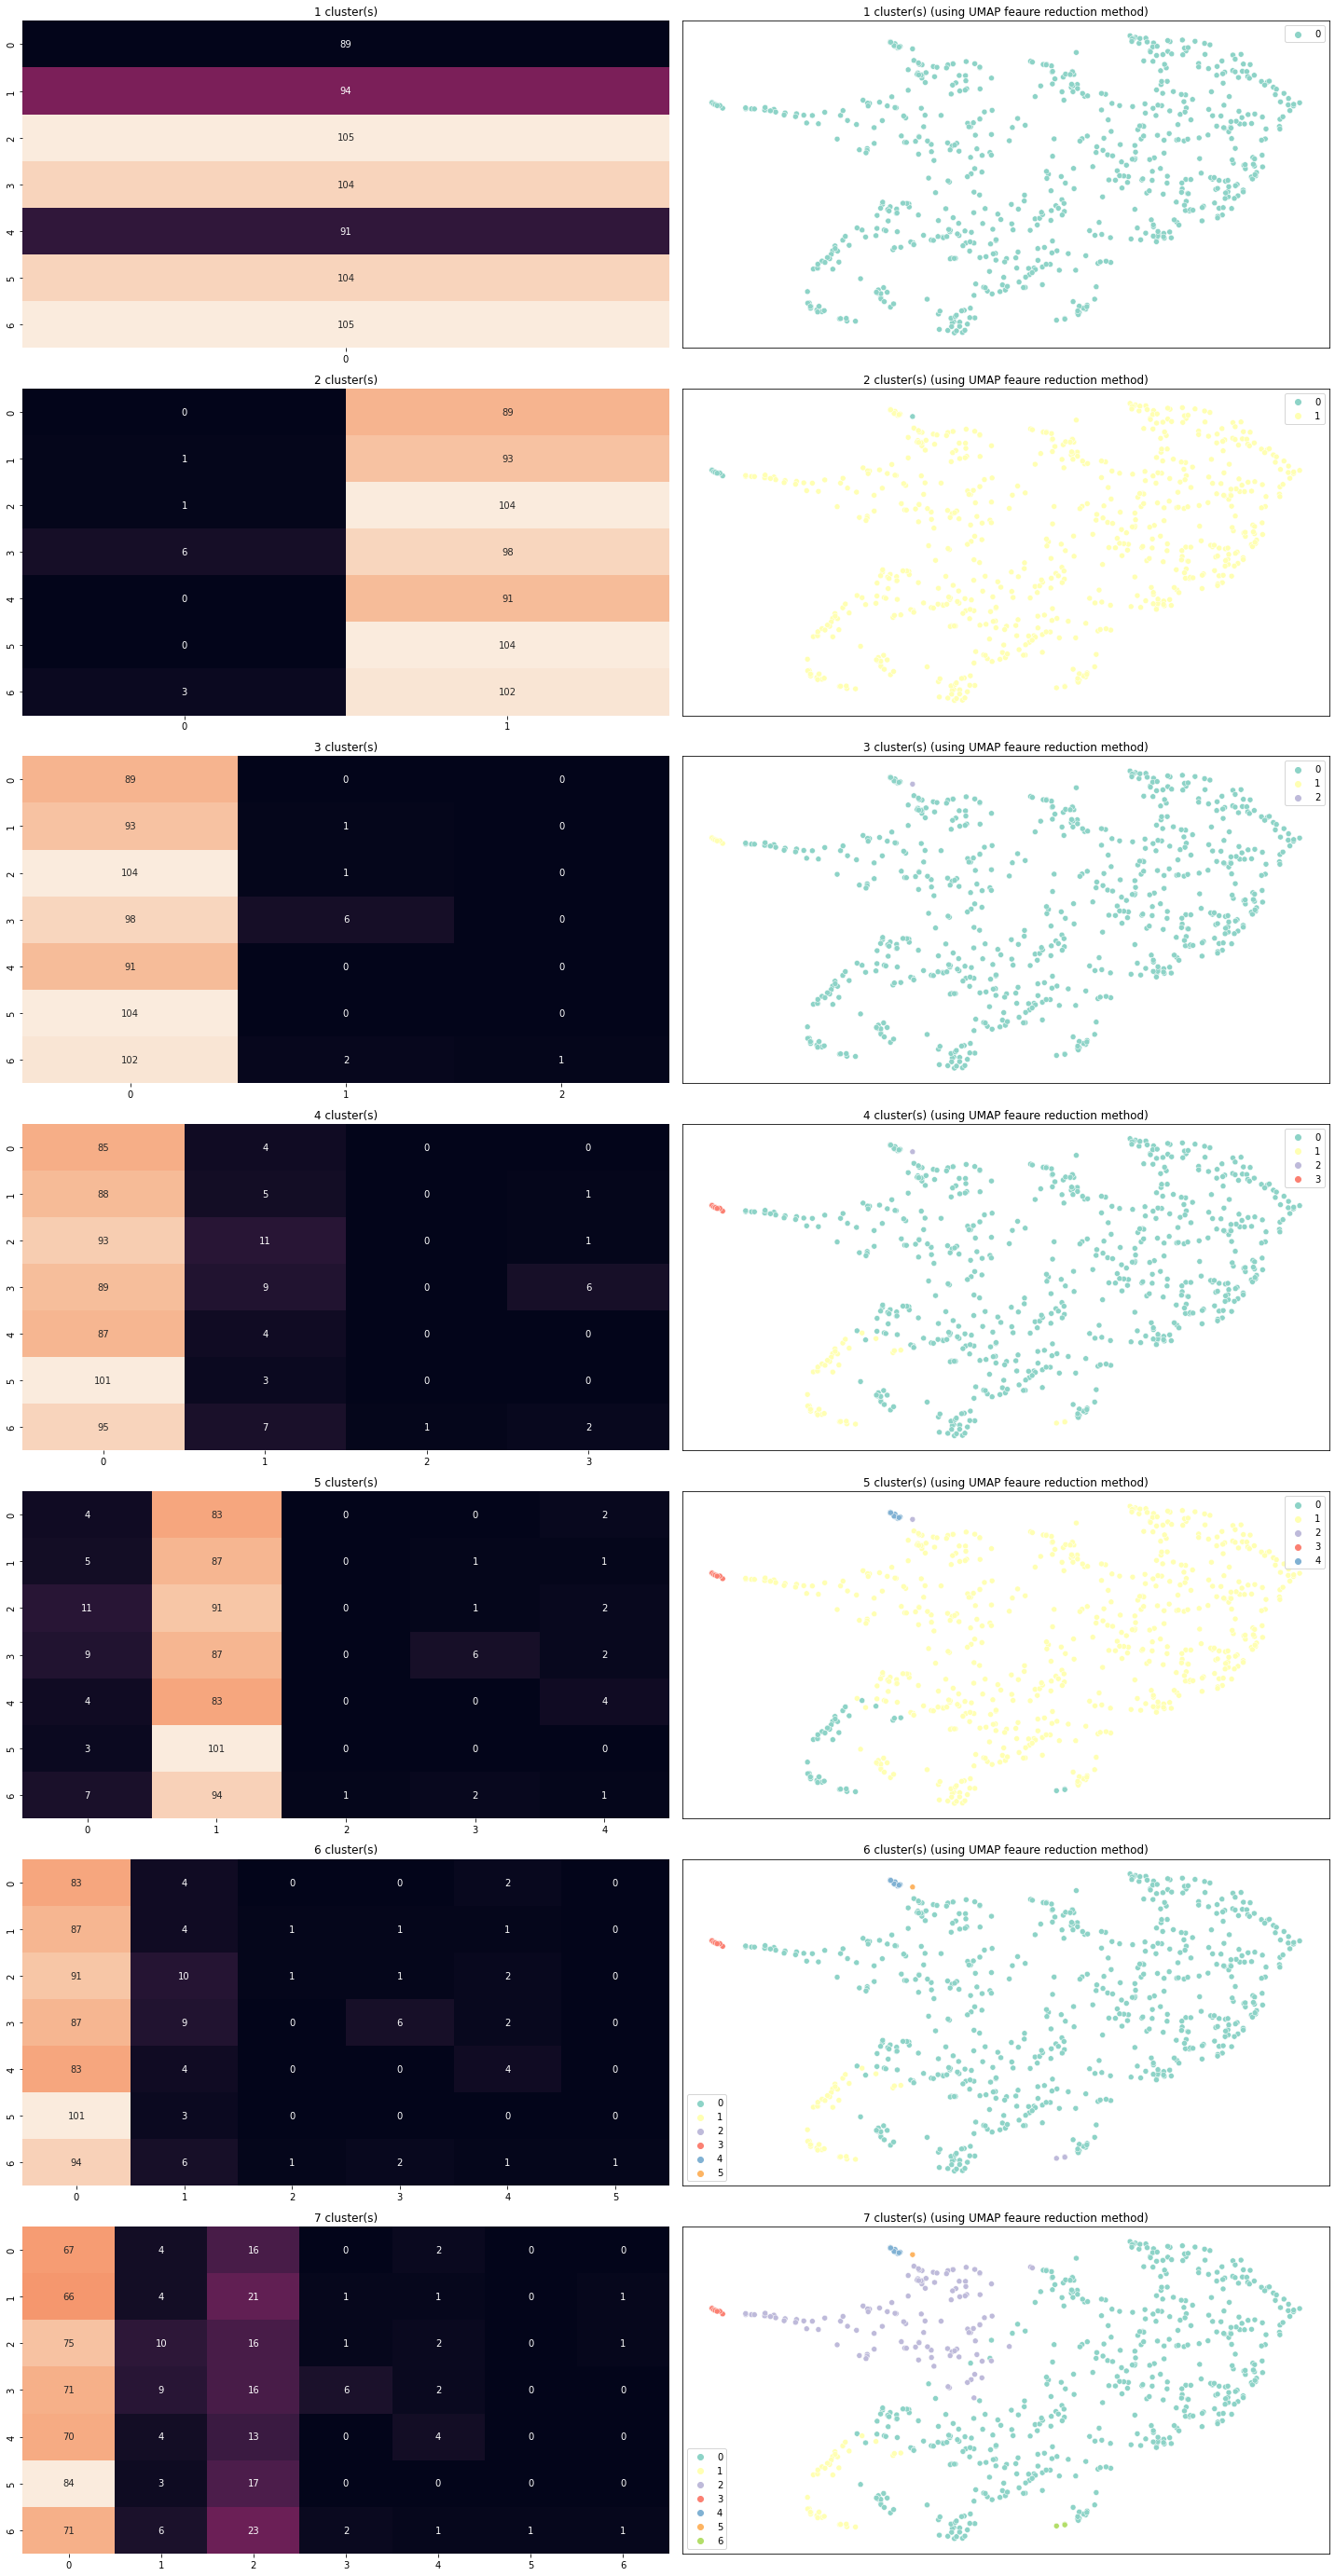

In [21]:
agglo.plotClusers(nClusters=7, fReductionPlot=False)

<span style="color:Orange">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


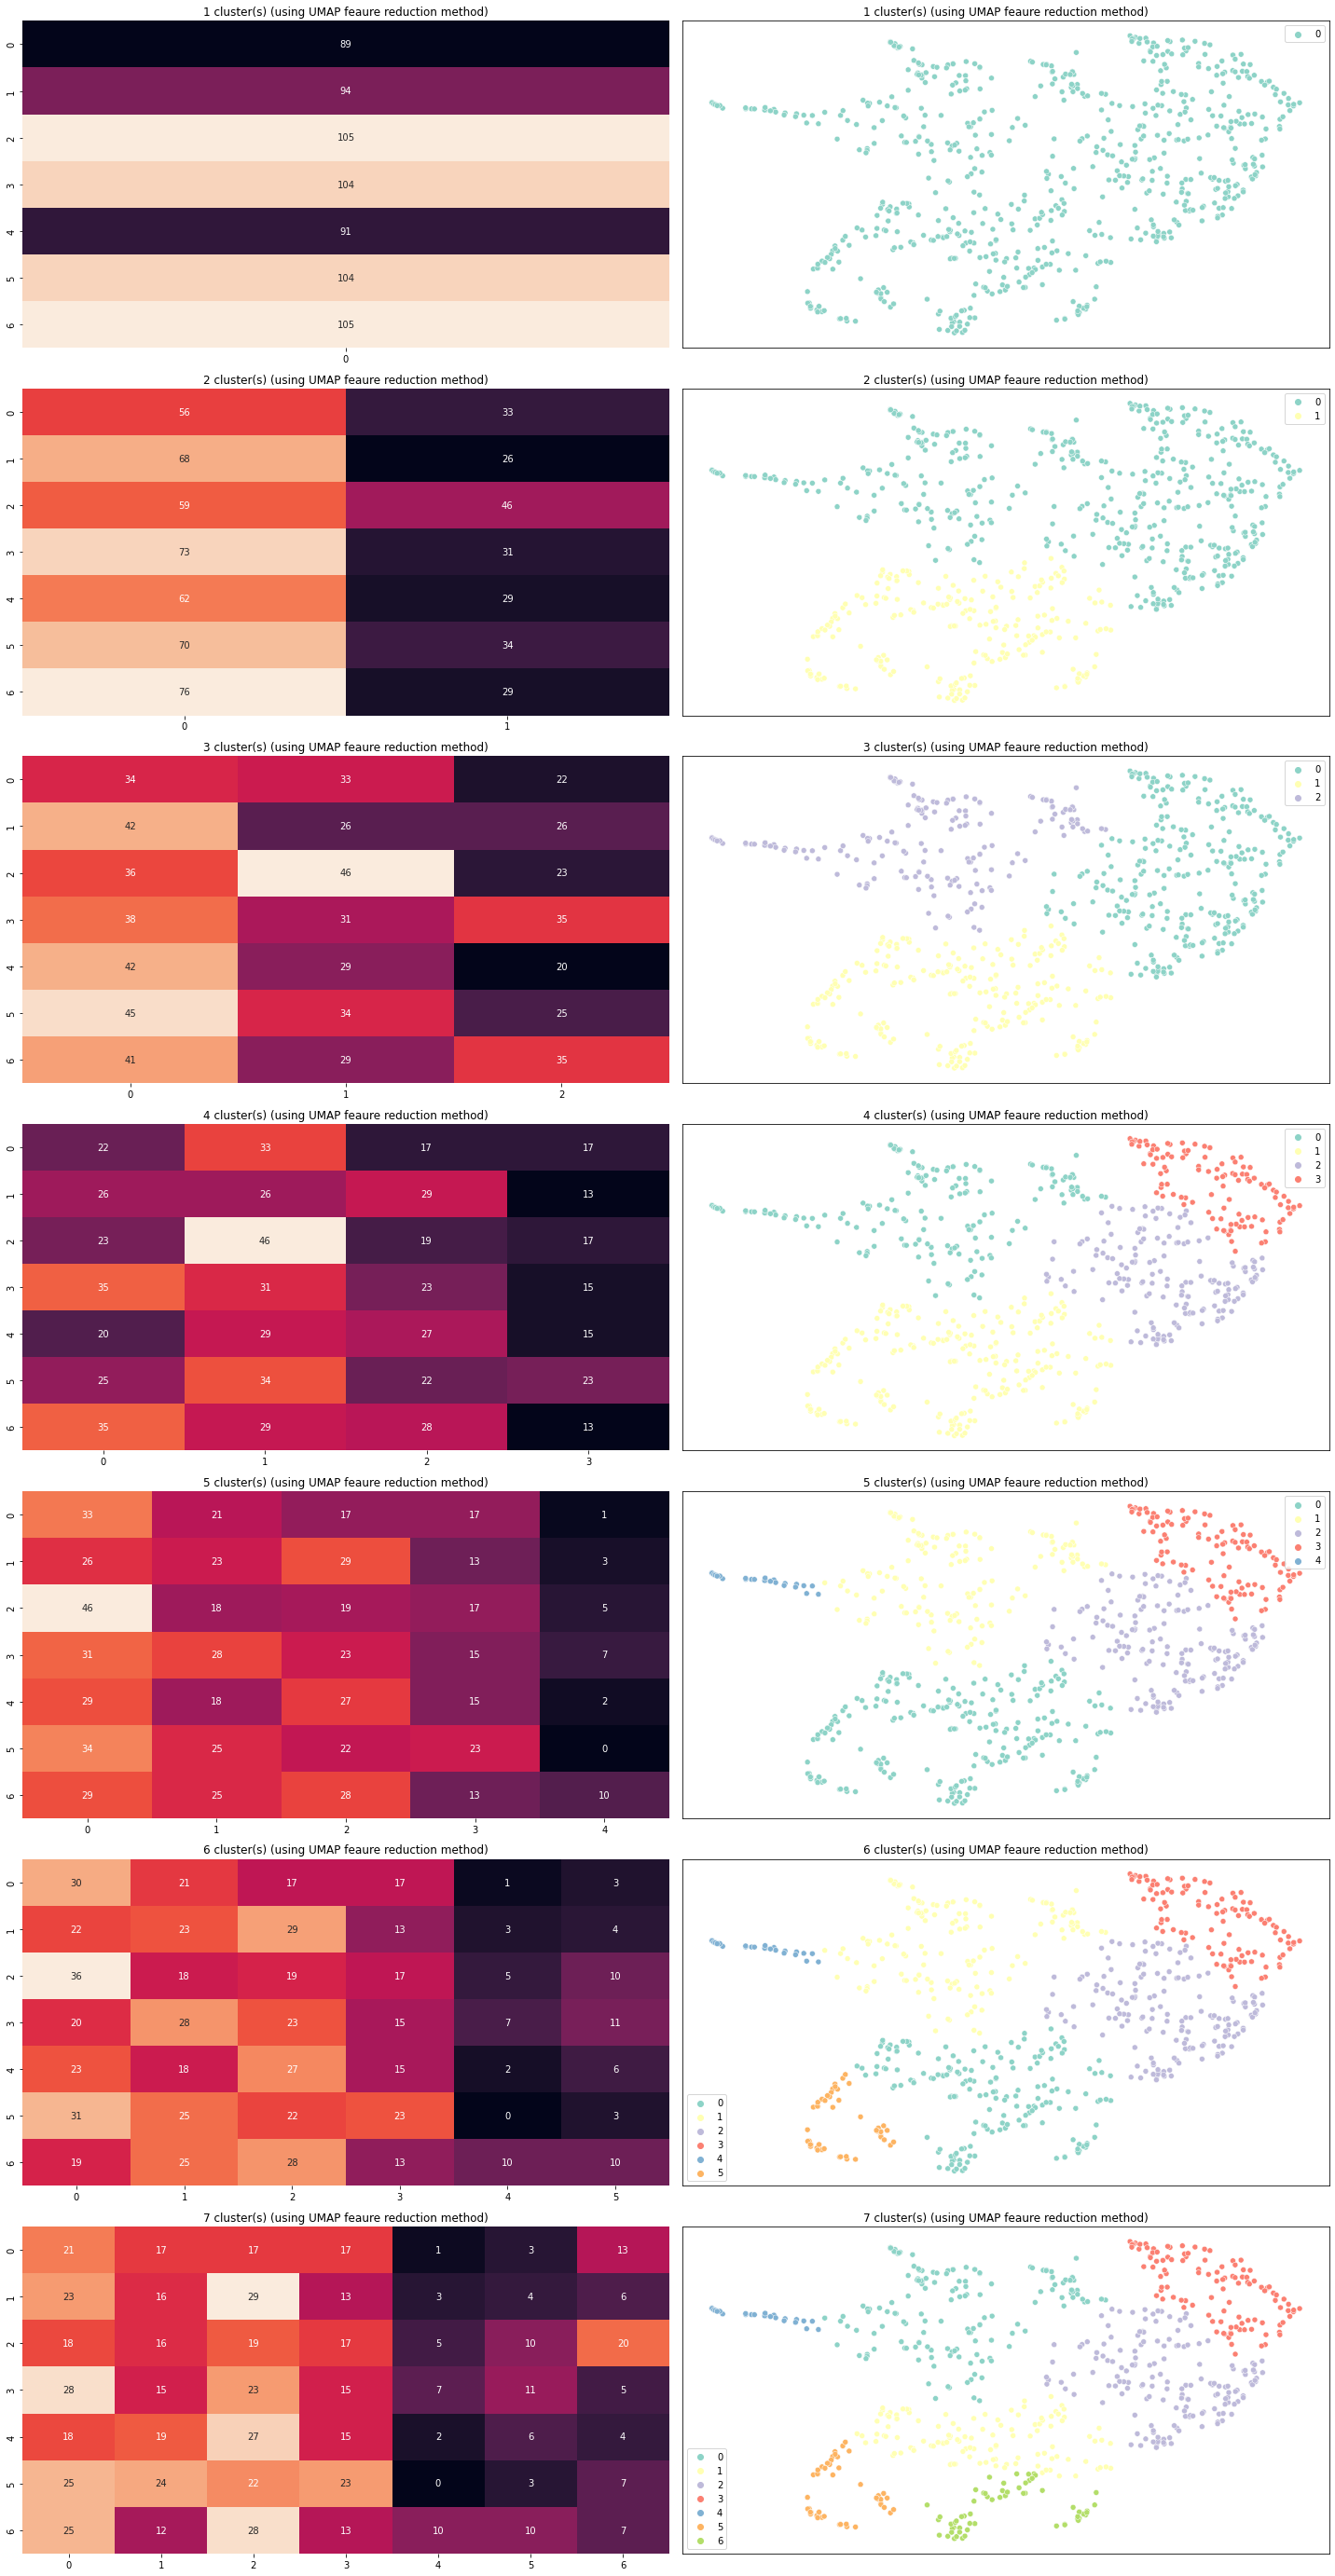

In [22]:
agglo.plotClusers(nClusters=7, fReductionPlot=True)

<span style="color:Orange">
<font size="4">plot clusters using the given array with original data </font>
</span> 


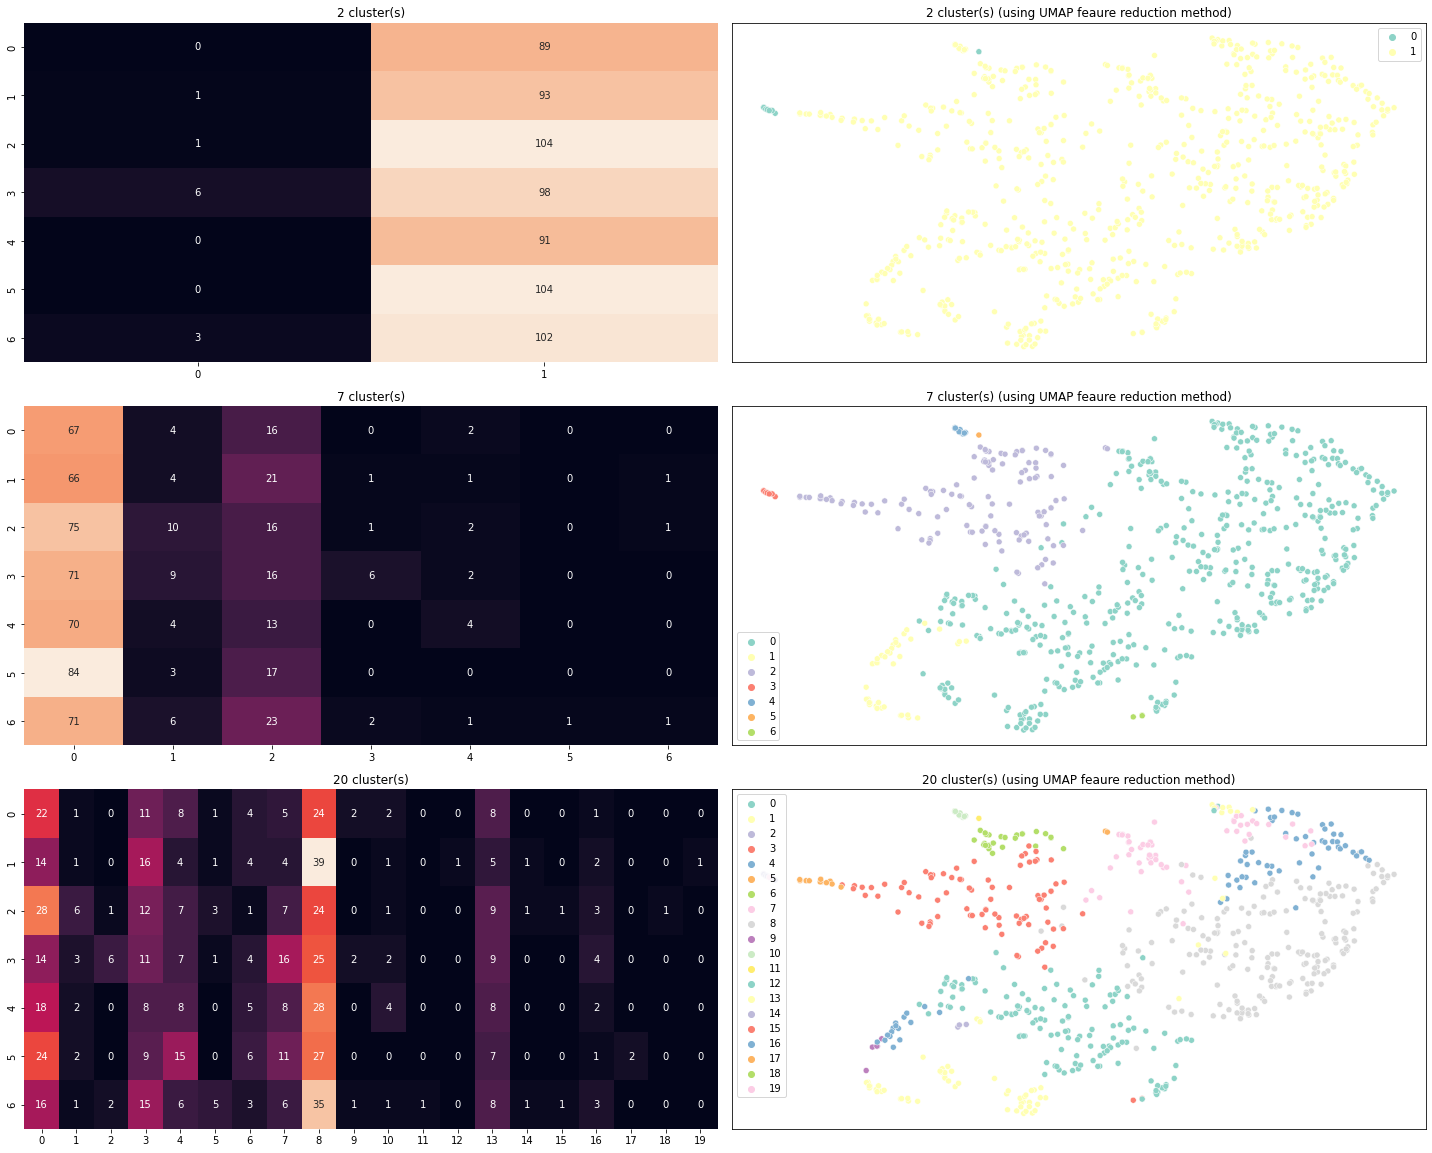

In [23]:
clusters = [2, 7, 20]
agglo.plotClustersUsingArr(clusters, fReduction=False)

<span style="color:Orange">
<font size="4">plot clusters using the given array with reduced data </font>
</span> 


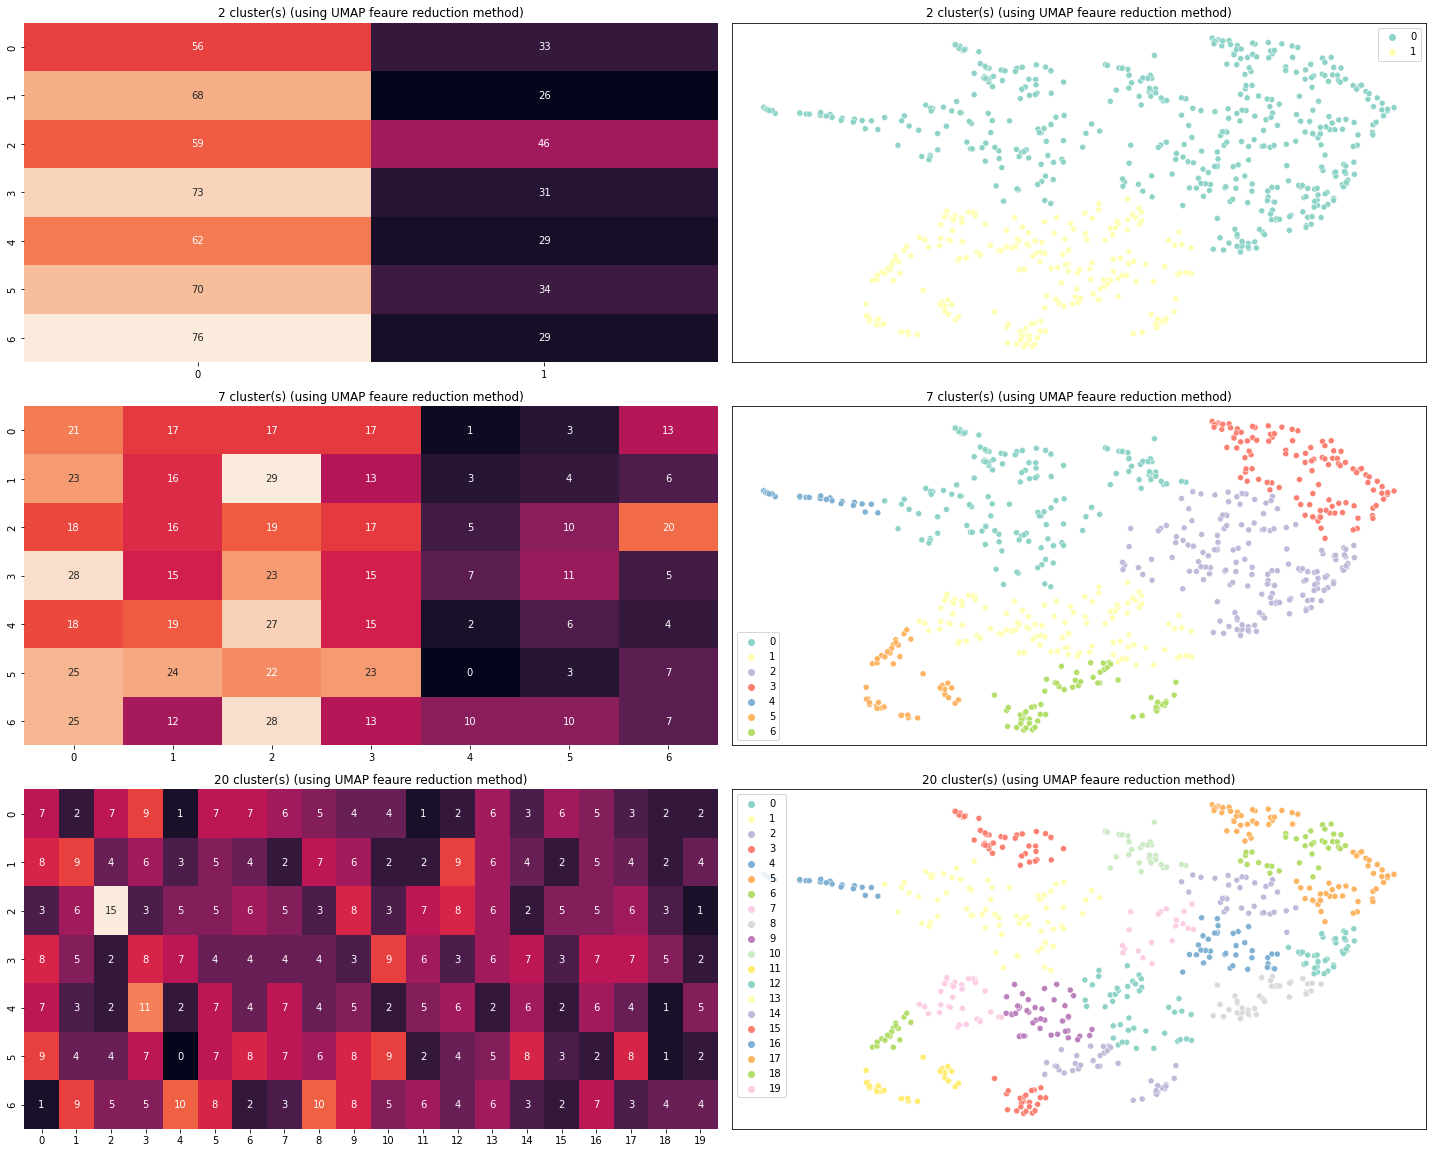

In [24]:
clusters = [2, 7, 20]
agglo.plotClustersUsingArr(clusters, fReduction=True)

<span style="color:Olive">
<font size="5">Agglomorative Clustering with fourier_tempogram</font>
</span> 


<span style="color:Orange">
<font size="4">Reading from files</font>
</span> 

In [25]:
dataset='591'
df=loaddata(
    features=["fourier_tempogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
labels=df["dastgah"]


labelencoder = LabelEncoder()
labelencoder.fit(labels)
y = labelencoder.transform(labels)

scaler = preprocessing.StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

In [26]:

from PCA import *
Pca=pca(feature_vectors)
feature_vectors=Pca.PCAout(10)

<span style="color:orange">
<font size="4">Creating object</font>
</span> 

In [27]:
from Agglomorative_model import *
agglo = Agglomorative_Clustering(feature_vectors,y)

<span style="color:Orange">
<font size="4">Confusion Matrix</font>
</span> 


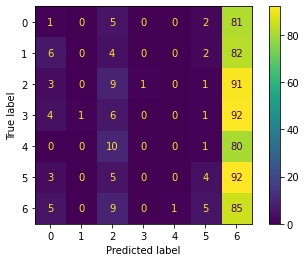

In [28]:
agglo.printConfusionMatrix()

<span style="color:Orange">
<font size="4">Dendogram</font>
</span> 


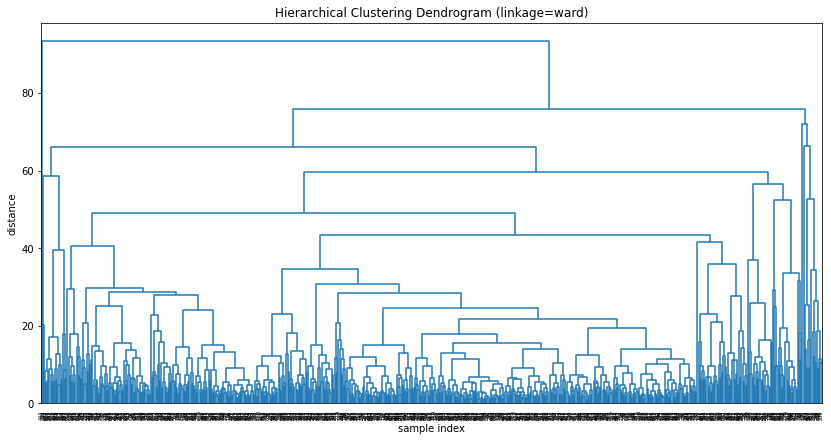

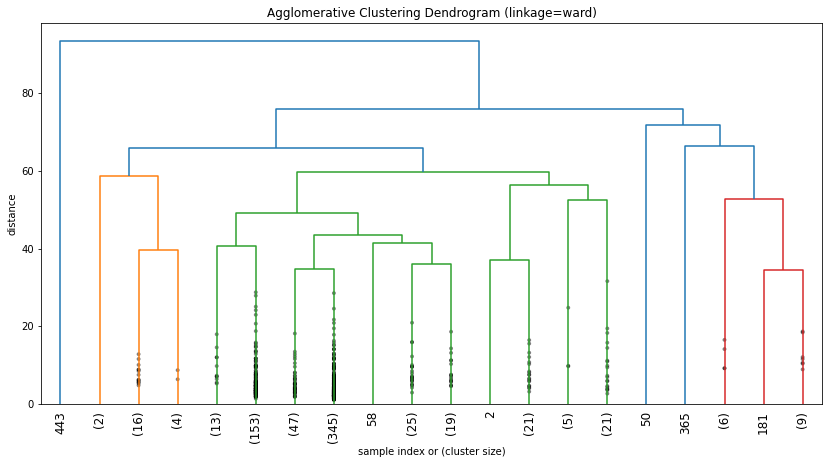

In [29]:
agglo.plotDendogram(nClusters=20)

<span style="color:Orange">
<font size="4">Print metrics results with original data</font>
</span> 


In [30]:
clusters = [2, 7, 20]
agglo.printDataMetrics(arr=clusters, fReduction=False)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.8544               62.6881              0.0957              
----------------------------------------------------------------------------------------------------
#clusters=7          0.3736               50.2087              1.3249              
----------------------------------------------------------------------------------------------------
#clusters=20         0.089                44.6169              1.2685              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      accuracy_score      
#clusters=2          -0.0                 -0.0001                        0.0028                         0.0014               0.2519               0.0028            

<span style="color:Orange">
<font size="4">Print metrics results with reduced data</font>
</span> 


In [31]:
clusters = [2, 7, 20]
agglo.printDataMetrics(arr=clusters, fReduction=True)

Name                 Silhouette Score     chcalinski_harabasz_score davies_bouldin_score
#clusters=2          0.36169999837875366  462.3853             1.0521              
----------------------------------------------------------------------------------------------------
#clusters=7          0.29820001125335693  519.7311             0.8341              
----------------------------------------------------------------------------------------------------
#clusters=20         0.3686000108718872   681.2494             0.7662              
----------------------------------------------------------------------------------------------------




Name                 adjusted_rand_score  adjusted_mutual_info_score     normalized_mutual_info_score   homogeneity_score    completeness_score   v_measure_score      accuracy_score      
#clusters=2          -0.0004              -0.0012                        0.0022                         0.0015               0.0044               0.0022            

<span style="color:Orange">
<font size="4">plot clusters from 1 to nClusters with original data </font>
</span> 


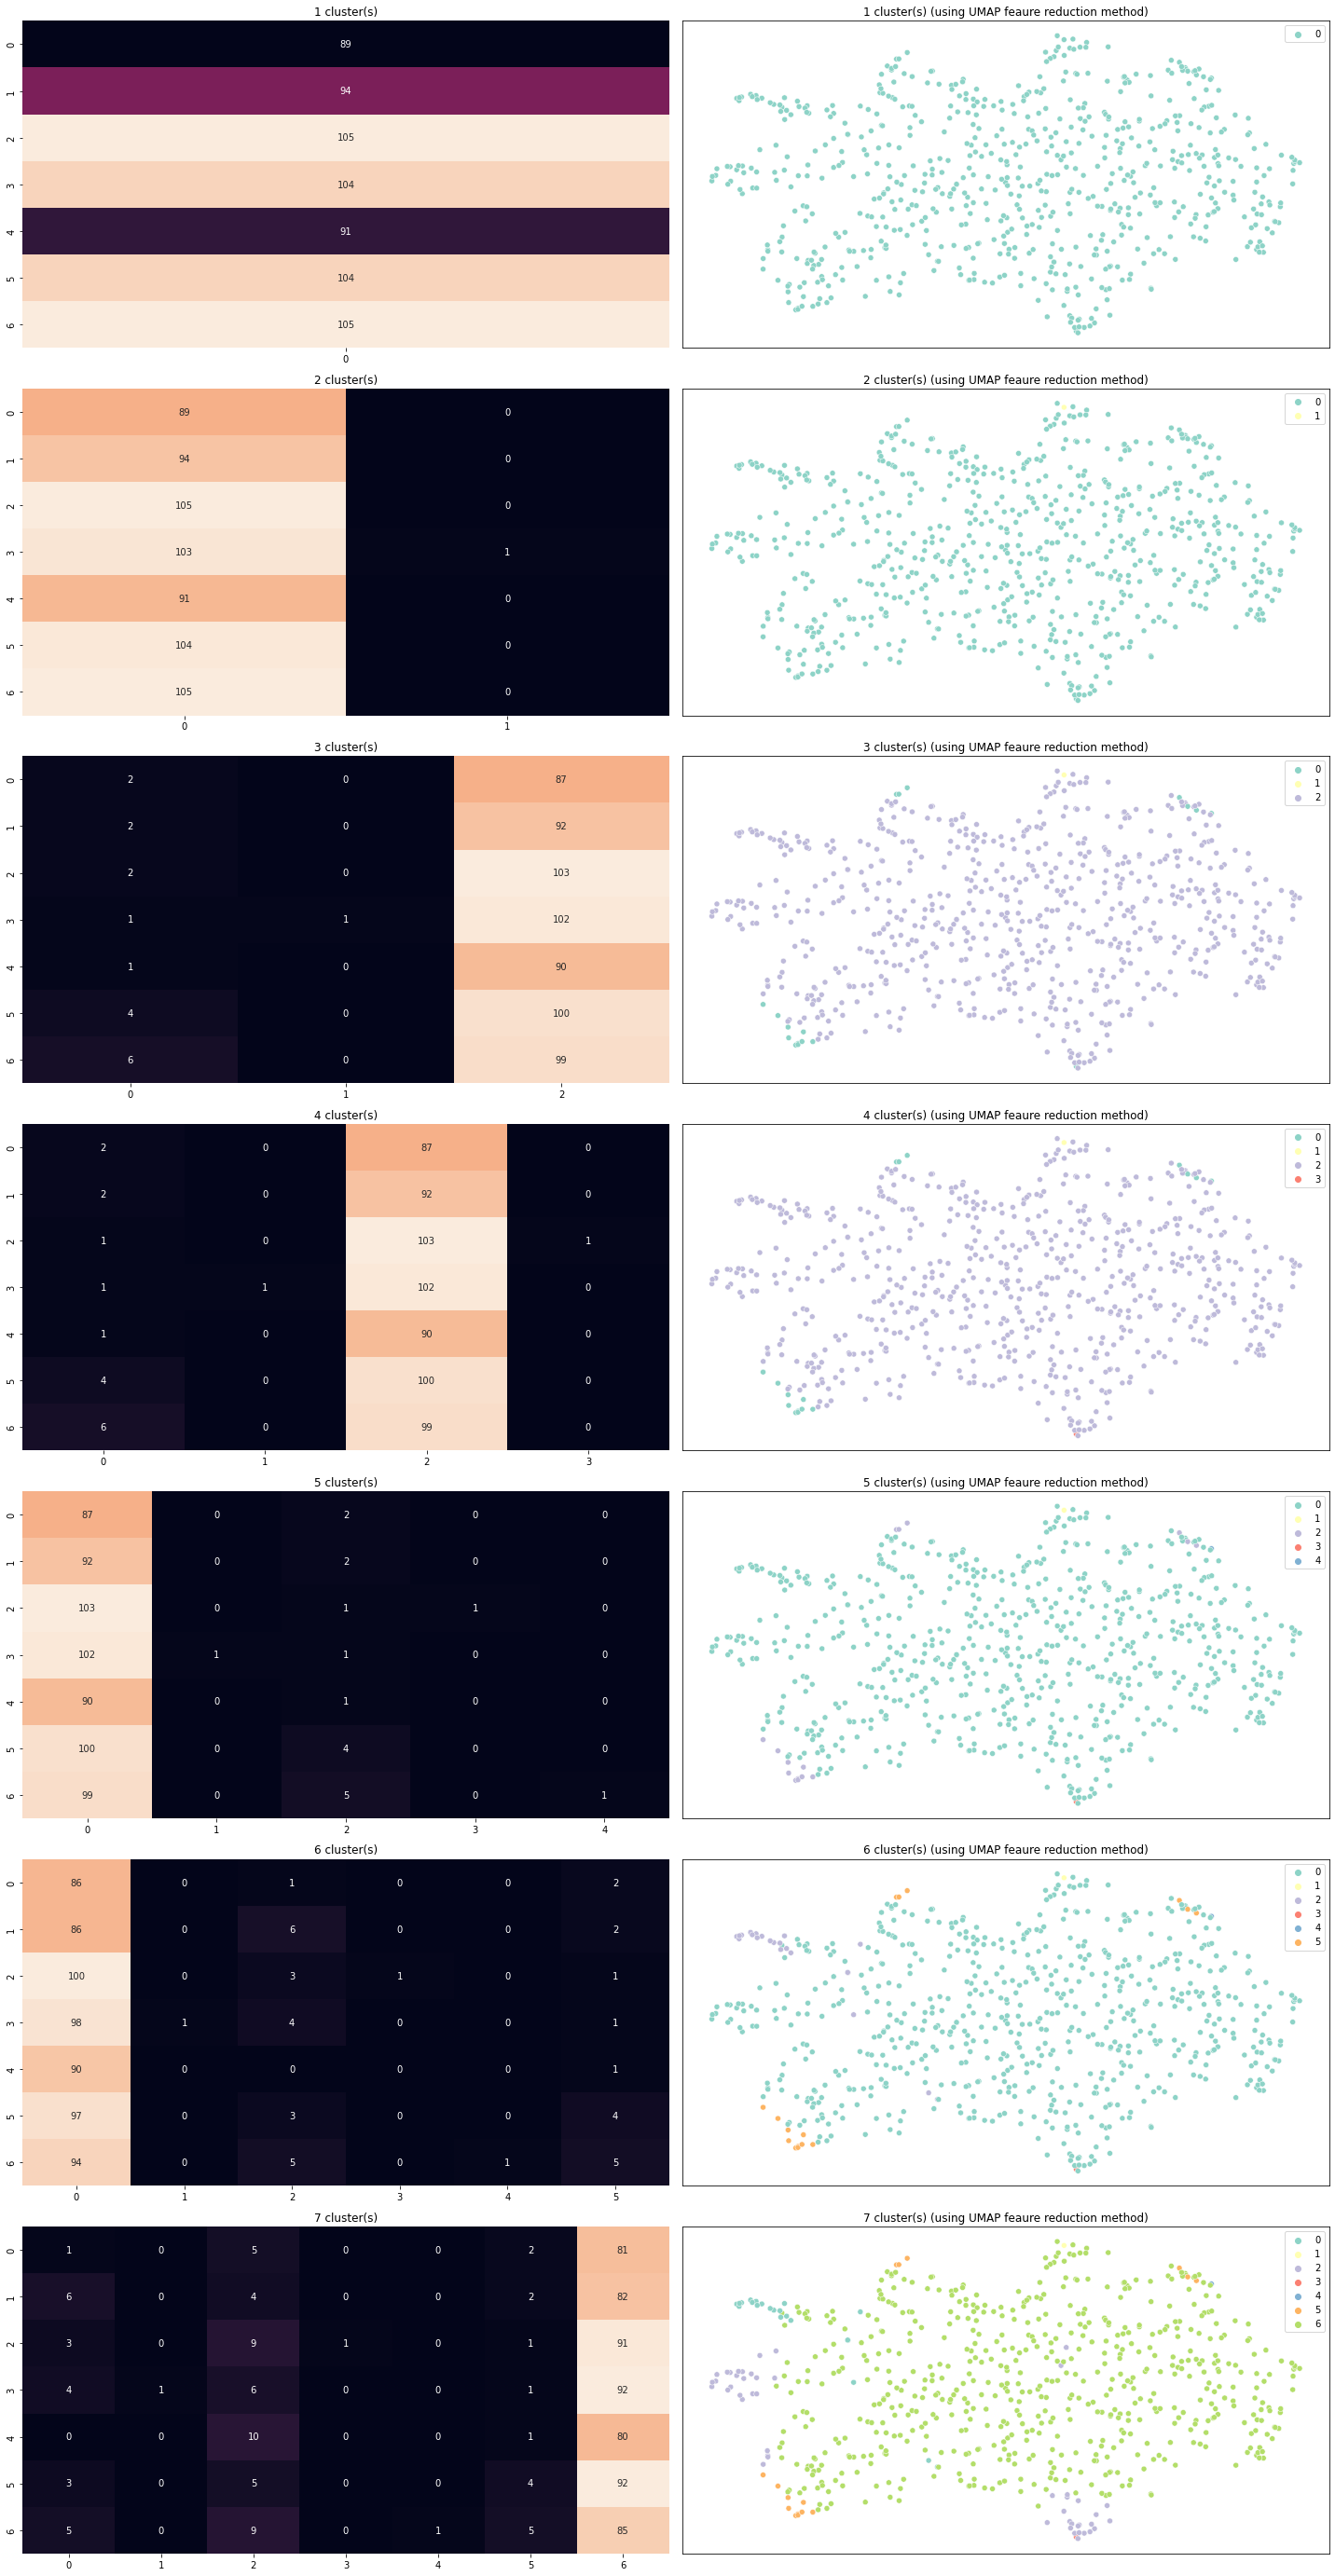

In [32]:
agglo.plotClusers(nClusters=7, fReductionPlot=False)

<span style="color:Orange">
<font size="4">plot clusters from 1 to nClusters with reduced data </font>
</span> 


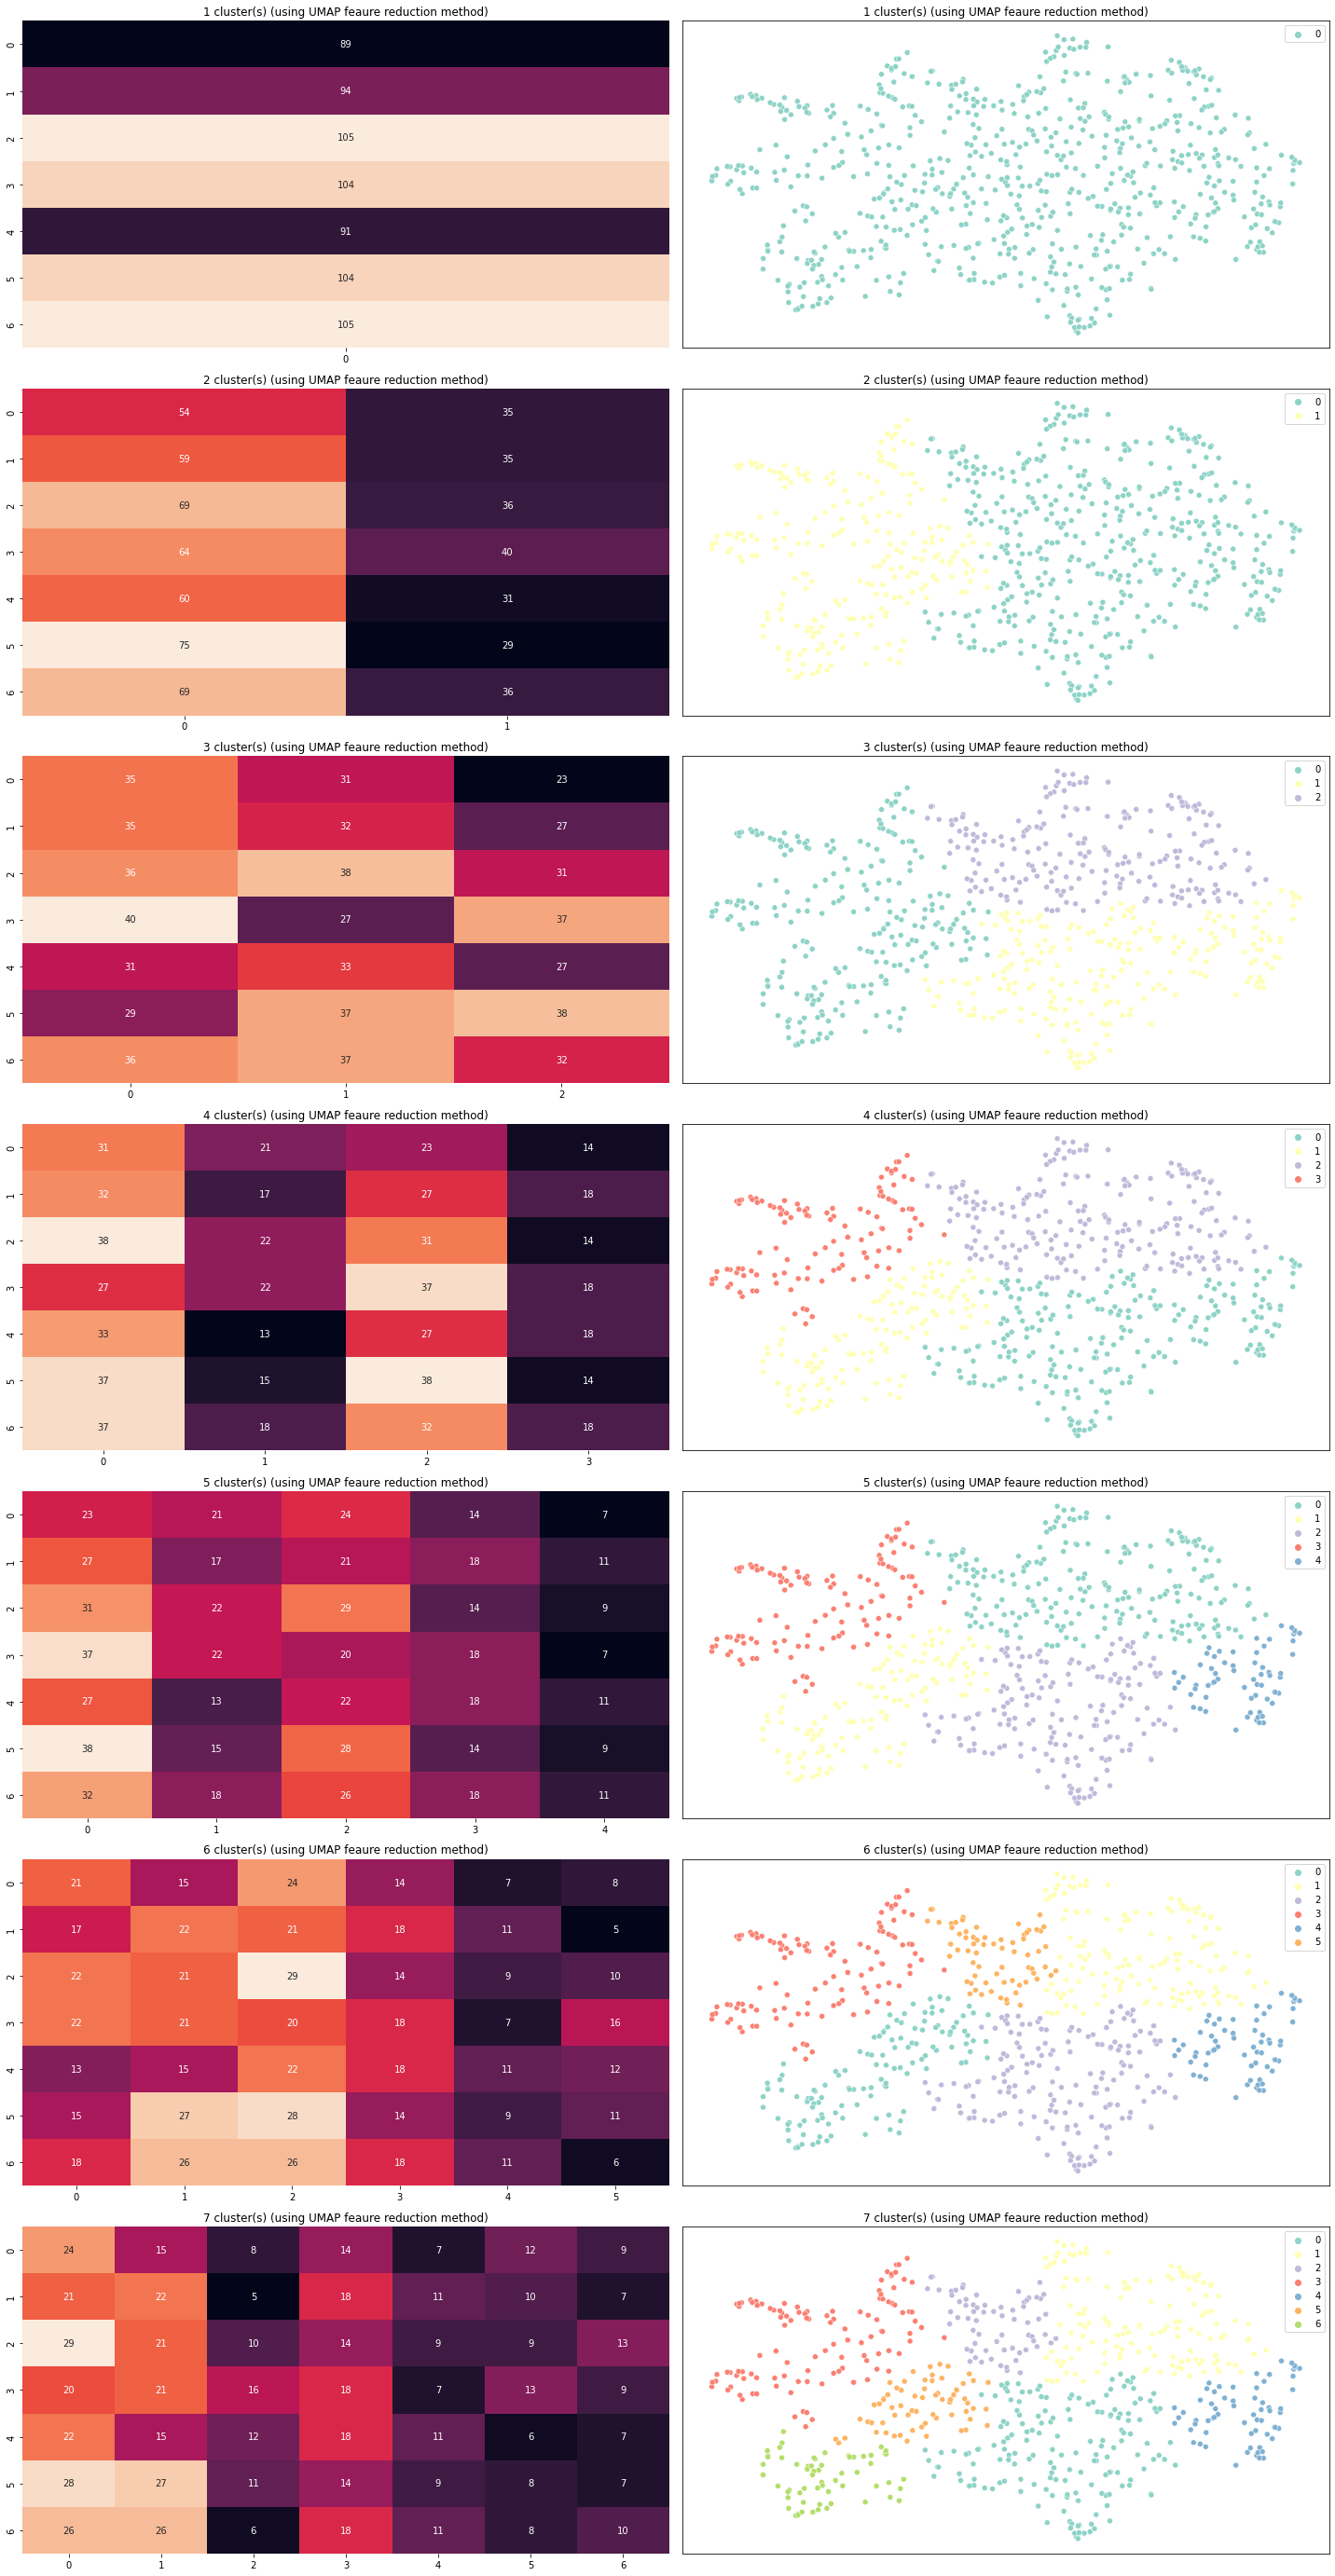

In [33]:
agglo.plotClusers(nClusters=7, fReductionPlot=True)

<span style="color:Orange">
<font size="4">plot clusters using the given array with original data </font>
</span> 


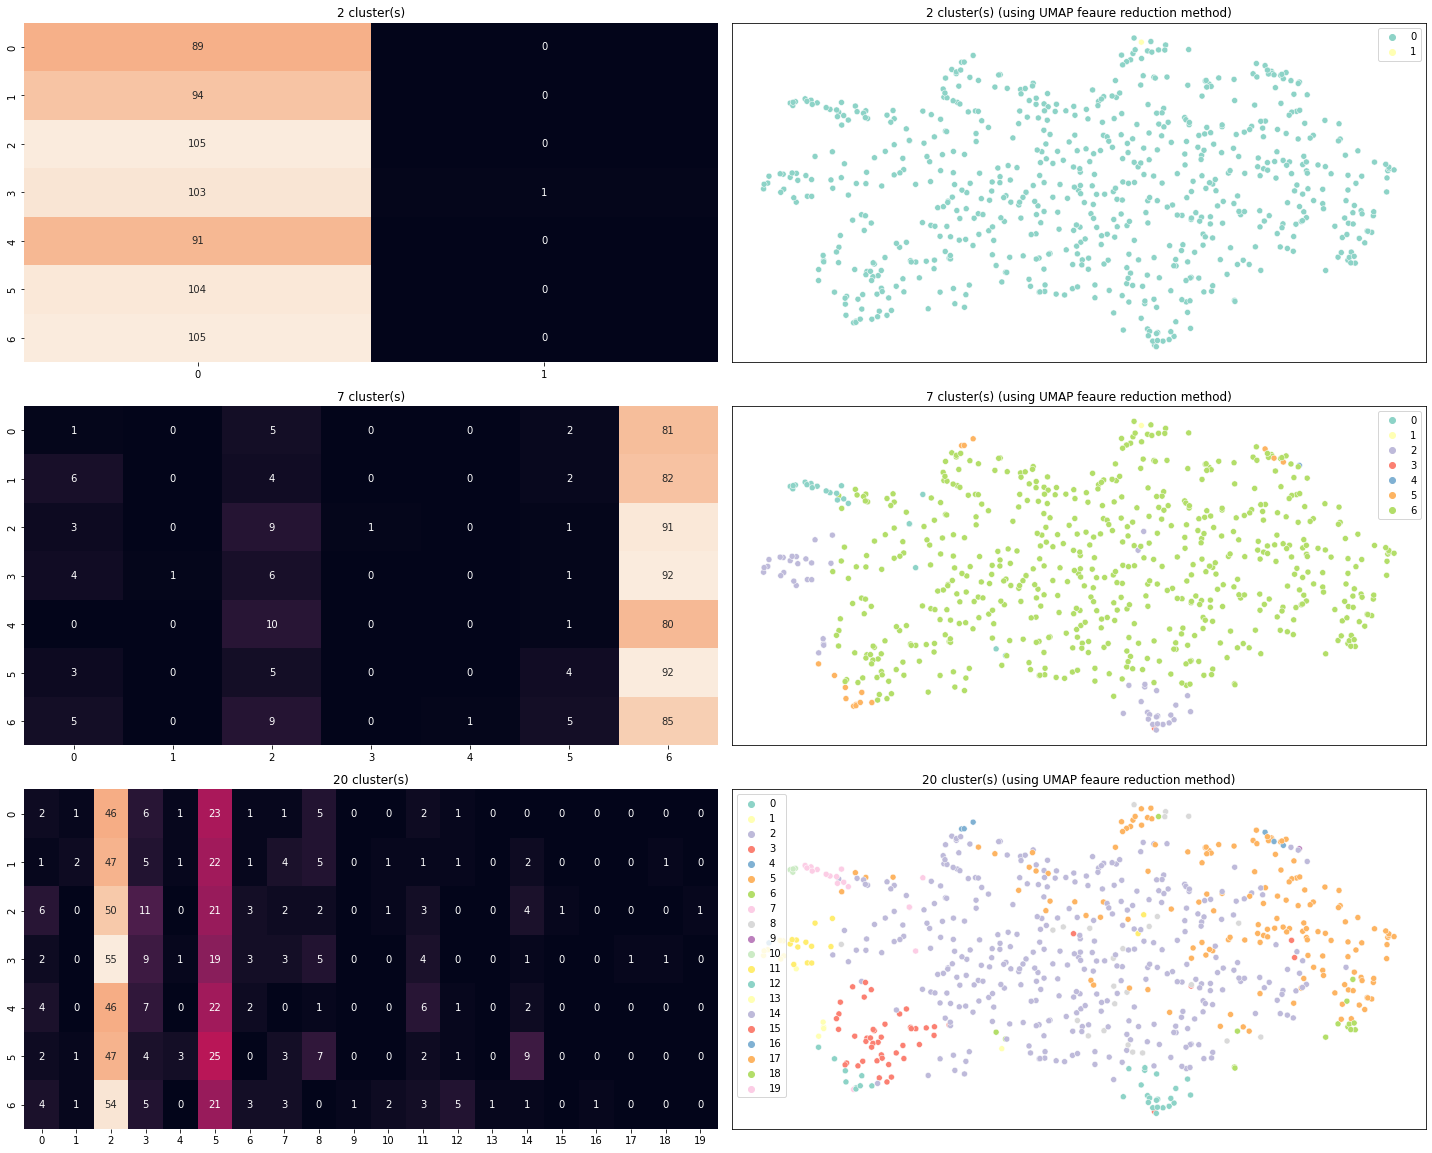

In [34]:
clusters = [2, 7, 20]
agglo.plotClustersUsingArr(clusters, fReduction=False)

<span style="color:Orange">
<font size="4">plot clusters using the given array with reduced data </font>
</span> 


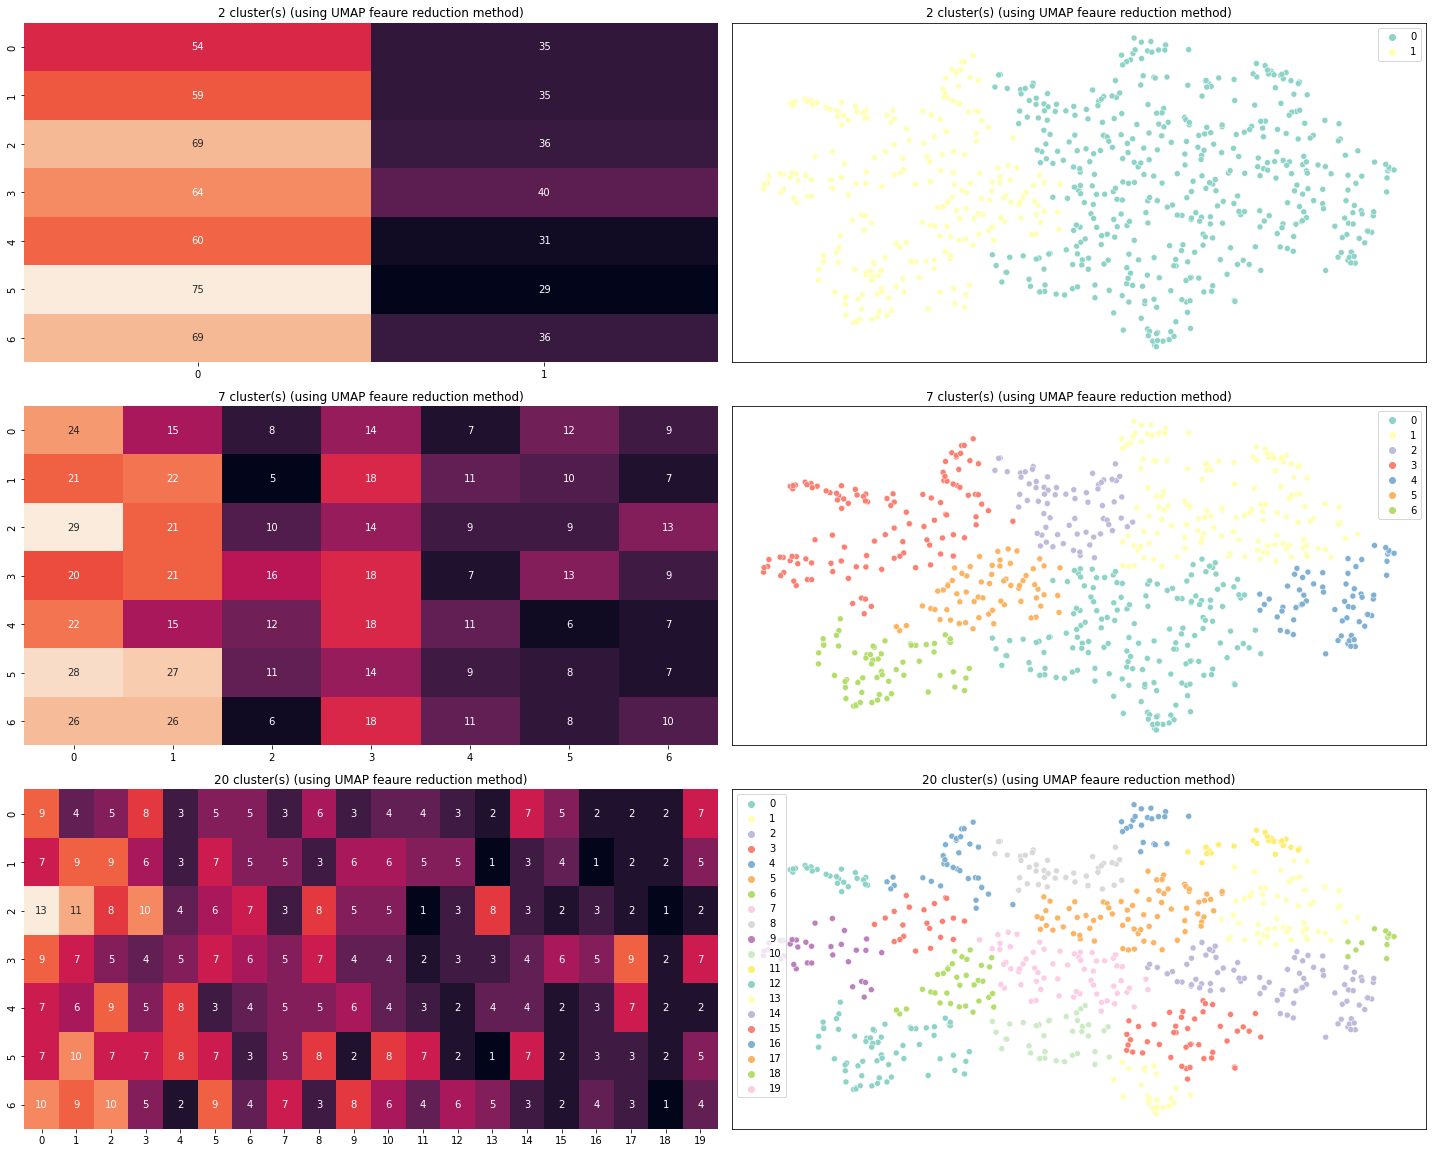

In [35]:
clusters = [2, 7, 20]
agglo.plotClustersUsingArr(clusters, fReduction=True)